<a href="https://colab.research.google.com/github/youlakmini/Credit-Card-Fraud-detection-project/blob/main/credit_card_fraud_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)

In [ ]:
#Loads data
df = pd.read_csv("creditcard.csv")

In [ ]:
#Shows dimensions of the dataset
#Shows number of transactions(43664) and number of columns(feature=31)
print("Dataset shape:", df.shape)


Dataset shape: (9965, 31)


In [ ]:
print("Fraud cases:", df['Class'].sum())
print("Normal cases:", (df['Class']==0).sum())

Fraud cases: 38.0
Normal cases: 9926


/tmp/ipython-input-3159673846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="coolwarm")


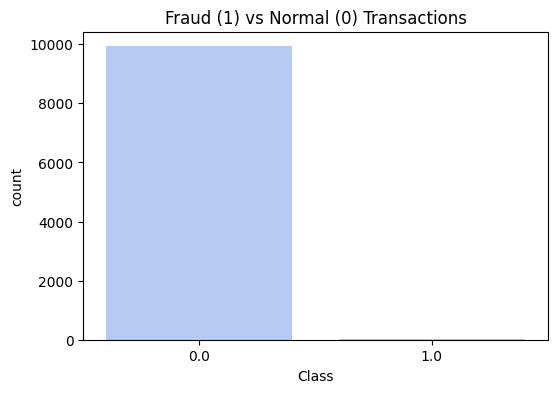

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, palette="coolwarm")
plt.title("Fraud (1) vs Normal (0) Transactions")
plt.show()

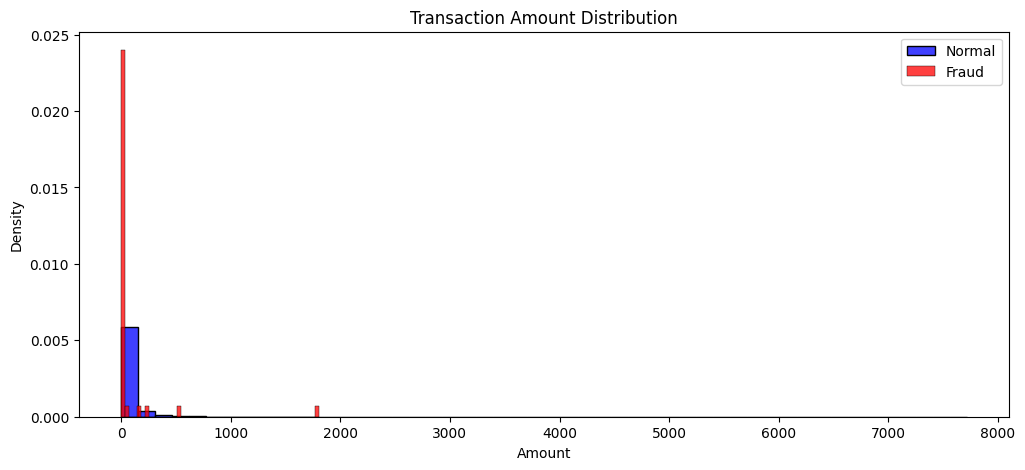

In [ ]:
# Amount distribution
plt.figure(figsize=(12,5))
sns.histplot(df[df['Class']==0]['Amount'], bins=50, color='blue', label='Normal', stat="density")
sns.histplot(df[df['Class']==1]['Amount'], bins=50, color='red', label='Fraud', stat="density")
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

In [ ]:
#Remove rows with NaN in 'Class' column
df.dropna(subset=['Class'], inplace=True)

#Train/test split
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred_lr = (y_proba_lr >= 0.5).astype(int)

In [ ]:
print("\n=== Logistic Regression ===")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("PR-AUC:", average_precision_score(y_test, y_proba_lr))
print(classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
ROC-AUC: 0.9896095717884131
PR-AUC: 0.7617018398268398
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1985
         1.0       0.75      0.75      0.75         8

    accuracy                           1.00      1993
   macro avg       0.87      0.87      0.87      1993
weighted avg       1.00      1.00      1.00      1993



In [ ]:
# ==============================
# 5. Random Forest
# ==============================
rf = RandomForestClassifier(
    n_estimators=200, max_depth=10,
    class_weight="balanced", random_state=42, n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_proba_rf >= 0.5).astype(int)

In [ ]:
print("\n=== Random Forest ===")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("PR-AUC:", average_precision_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
ROC-AUC: 0.9998740554156171
PR-AUC: 0.9704861111111112
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1985
         1.0       1.00      0.62      0.77         8

    accuracy                           1.00      1993
   macro avg       1.00      0.81      0.88      1993
weighted avg       1.00      1.00      1.00      1993



In [ ]:
# ==============================
# 6. Isolation Forest (unsupervised)
# ==============================
iso = IsolationForest(
    n_estimators=200, contamination=0.001,
    random_state=42, n_jobs=-1
)
iso.fit(X_train)

IsolationForest(contamination=0.001, n_estimators=200, n_jobs=-1,
                random_state=42)

In [ ]:
y_pred_iso = iso.predict(X_test)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

In [ ]:
print("\n=== Isolation Forest ===")
print(classification_report(y_test, y_pred_iso))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_iso))


=== Isolation Forest ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1985
         1.0       0.00      0.00      0.00         8

    accuracy                           1.00      1993
   macro avg       0.50      0.50      0.50      1993
weighted avg       0.99      1.00      0.99      1993

Confusion Matrix:
 [[1985    0]
 [   8    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-1998278293.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


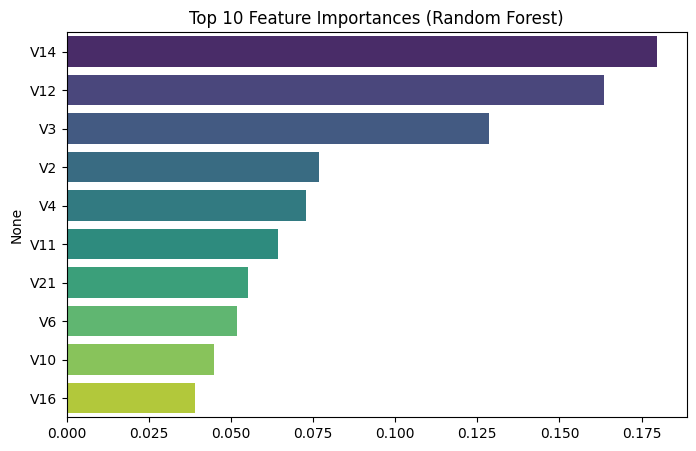

In [ ]:
# Calculate feature importances from the Random Forest model
importances = rf.feature_importances_

# Get the indices of the top 10 features
indices = np.argsort(importances)[::-1][:10]

# ==============================
# 7. Feature Importance (Random Forest)
# ==============================
plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [ ]:
# ==============================
# 8. ROC & PR Curves
# ==============================
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'ROC Curve')

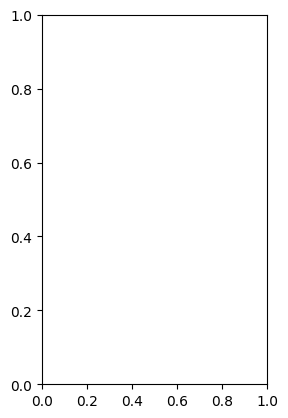

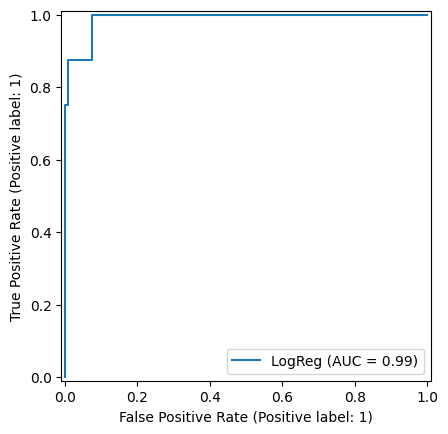

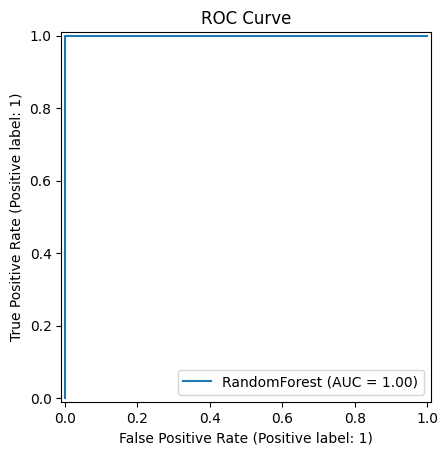

In [ ]:
# ROC Curve
plt.subplot(1,2,1)
RocCurveDisplay.from_predictions(y_test, y_proba_lr, name="LogReg")
RocCurveDisplay.from_predictions(y_test, y_proba_rf, name="RandomForest")
plt.title("ROC Curve")

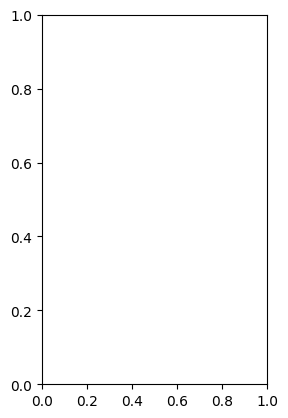

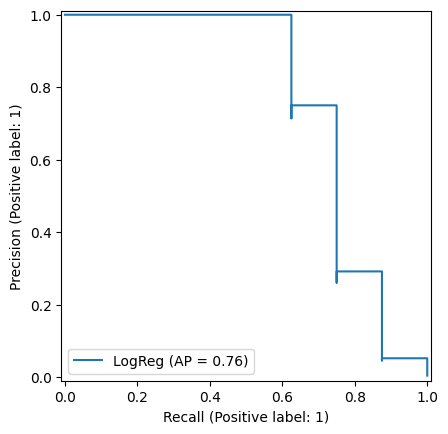

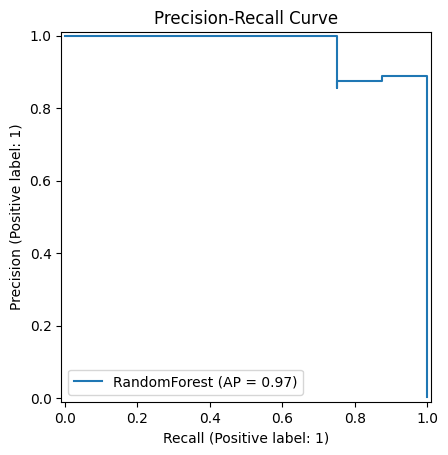

In [ ]:
# Precision-Recall Curve
plt.subplot(1,2,2)
PrecisionRecallDisplay.from_predictions(y_test, y_proba_lr, name="LogReg")
PrecisionRecallDisplay.from_predictions(y_test, y_proba_rf, name="RandomForest")
plt.title("Precision-Recall Curve")
plt.show()